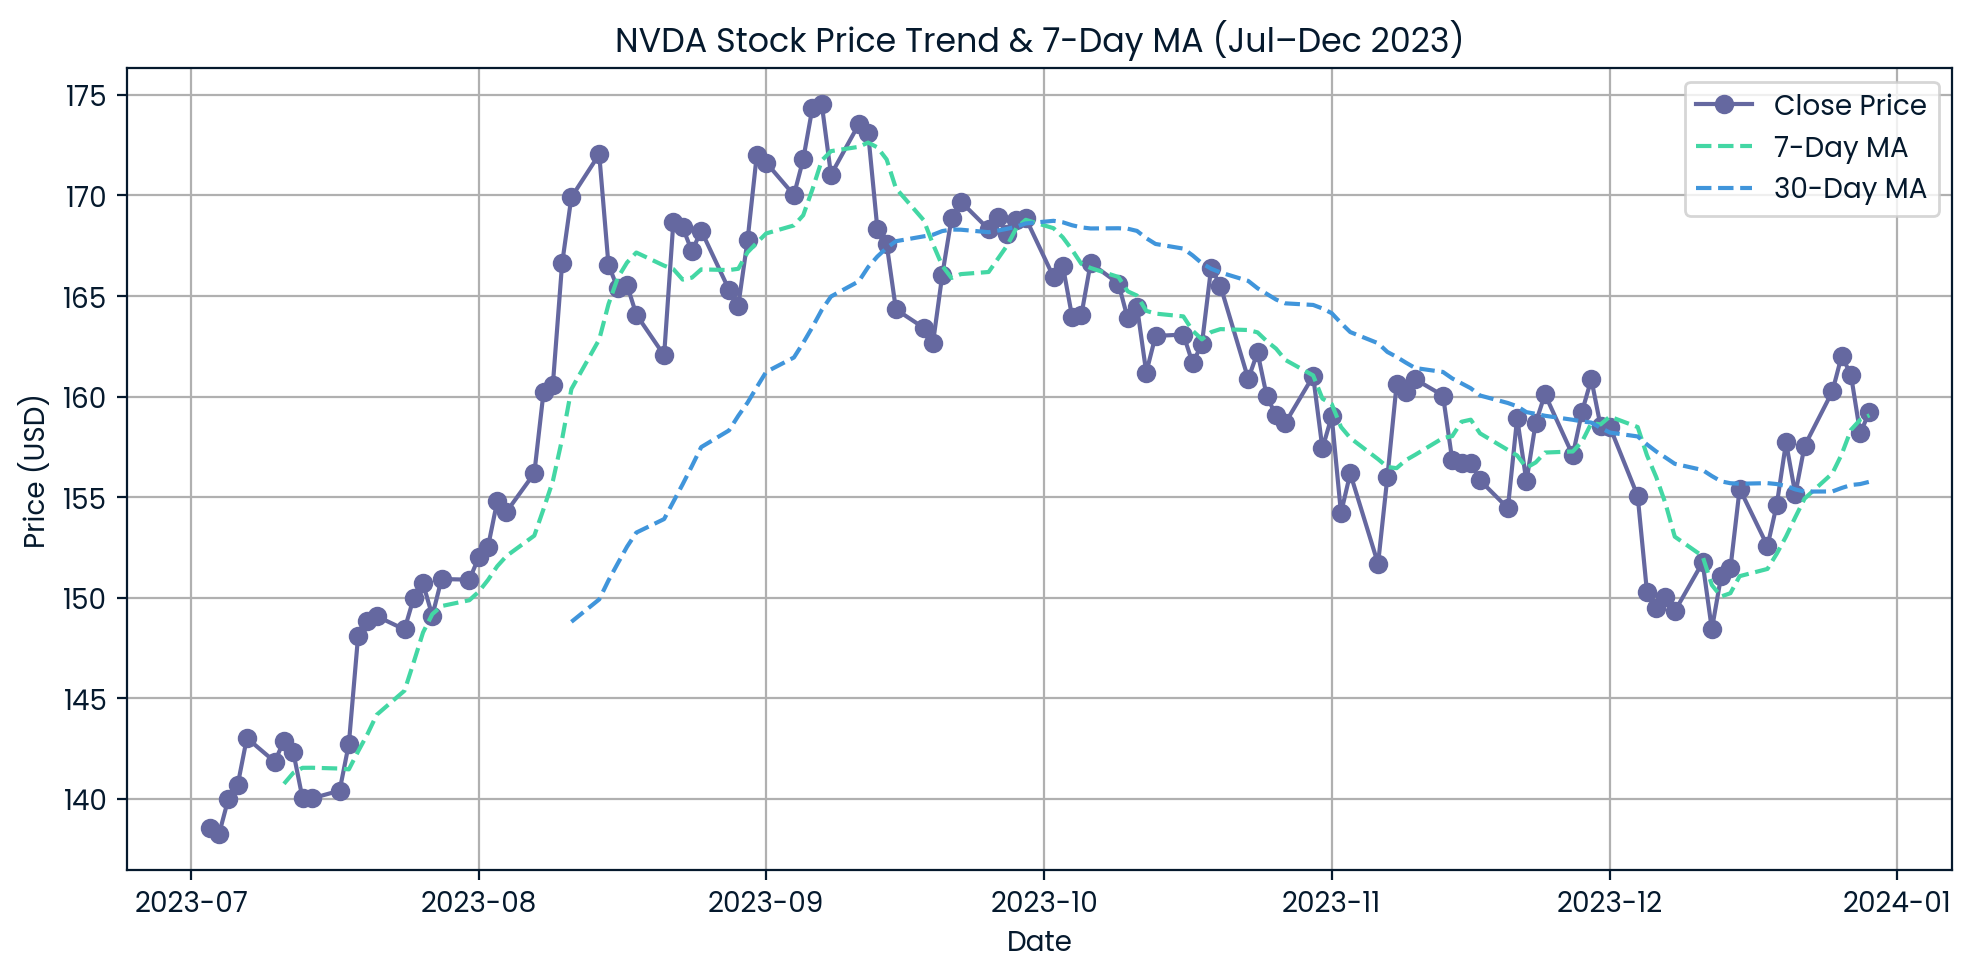

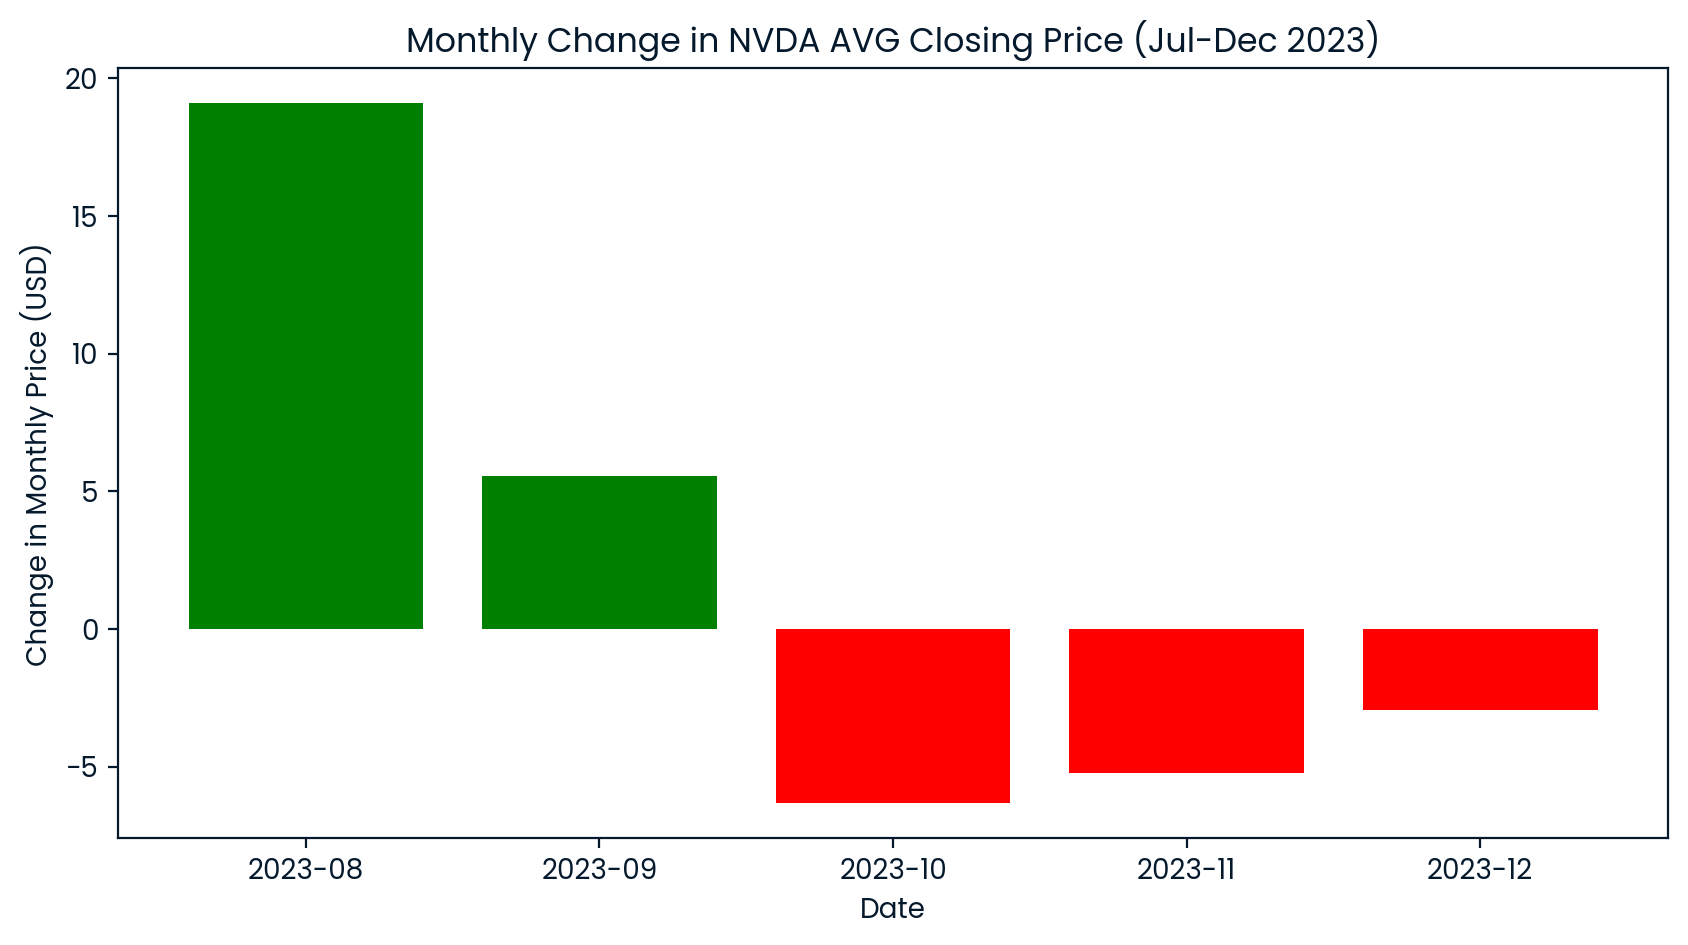

Highest gains month!!: Aug 2023 (+$19.09)
Highest drop month zzz: Oct 2023 (+$-6.34)


In [79]:
#1-2 hr first project! (bc i cried in marco's arm) -- 23/3/25

#pandas for data manipulation
import pandas as pd

#matplotlib for plotting
import matplotlib.pyplot as plt

#sqlalchemy to handle SQL databases
from sqlalchemy import create_engine

#load NVIDIA stock data bc yfinance is blocked by DataLab
data = pd.read_csv("NVDA_2023_stock_data.csv",parse_dates=["Date"], index_col="Date")

#display first few rows
data.head()

engine = create_engine("sqlite:///stocks.db")

#save dataframe to table
data.to_sql("nvda_stock", con=engine, if_exists="replace", index =True)

#query only closing price from Jul - Dec
query = """
SELECT Date, Close FROM nvda_stock
WHERE Date >= '2023-07-01' AND Date <= '2023-12-31'
ORDER BY Date ASC
"""

#run query and load result in dataframe converting date column to datetime format
filtered_data = pd.read_sql(query, con=engine, parse_dates=["Date"])

#display first few rows of filtered data
#filtered_data.head()

#adding 7-day MA column
filtered_data['MA7'] = filtered_data['Close'].rolling(window=7).mean()

#adding 30-day MA column
filtered_data['MA30'] = filtered_data['Close'].rolling(window=30).mean()

#plotting of closing prices
plt.figure(figsize=(10,5))
plt.plot(filtered_data['Date'],filtered_data['Close'], marker ='o', linestyle='-', label='Close Price')
plt.plot(filtered_data['Date'],filtered_data['MA7'], linestyle='--', label='7-Day MA')
plt.plot(filtered_data['Date'],filtered_data['MA30'], linestyle='--', label='30-Day MA')
plt.title("NVDA Stock Price Trend & 7-Day MA (Jul–Dec 2023)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Stock Trend Summary (NVDA 2023)
# - Loaded custom NVDA stock data from CSV
# - Stored data into a local SQLite database
# - Queried trends using SQL
# - Plotted closing price and moving average


### Is NVDA generally going up?
# MA7 cross-over MA30 in recent TF --> possible uptrend (visual analysis)
# BUT lets see the monthly avg movement 

# Ensure it's datetime
filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])
# Set it as the index
filtered_data.set_index('Date', inplace=True)

monthly_avg = filtered_data['Close'].resample('M').mean()
monthly_change = monthly_avg.diff()
monthly_change = monthly_change.dropna() #remove NAN
#print(monthly_change)

#visualize it w/ bar chart
colors = ['g' if val > 0 else 'r' for val in monthly_change]
plt.figure(figsize=(10,5))
plt.bar(monthly_change.index.strftime ('%Y-%m'), monthly_change, color=colors)
plt.xlabel("Date")
plt.ylabel("Change in Monthly Price (USD)")
plt.title("Monthly Change in NVDA AVG Closing Price (Jul-Dec 2023)")
plt.show()

### which month is the highest gains/higihest drop
max_gain = monthly_change.max()
max_gain_month = monthly_change.idxmax().strftime('%b %Y')

max_drop = monthly_change.min()
max_drop_month = monthly_change.idxmin().strftime('%b %Y')

print(f"Highest gains month!!: {max_gain_month} (+${max_gain:.2f})")
print(f"Highest drop month zzz: {max_drop_month} (+${max_drop:.2f})")